In [275]:
import pandas as pd
import numpy as np
import os, time,json
import tmdbsimple as tmdb 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
np.random.seed(321)
scipy.__version__
from tqdm.notebook import tqdm_notebook

In [276]:
pd.set_option('display.max_columns',100)

In [277]:
with open('/Data Enrichment/Practices/Practices/.secret/tmdb_api.json', 'r') as f:
    login = json.load(f)
## Display the keys of the loaded dict
login.keys()

dict_keys(['API Key (v3 auth)'])

In [278]:
tmdb.API_KEY =  login['API Key (v3 auth)']

In [279]:
FOLDER = 'Data/'
file_list = sorted(os.listdir(FOLDER))
file_list

['.ipynb_checkpoints',
 'combined_tmdb_data.csv.gz',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'final_tmdb_data_2003.csv.gz',
 'final_tmdb_data_2004.csv.gz',
 'final_tmdb_data_2005.csv.gz',
 'final_tmdb_data_2006.csv.gz',
 'final_tmdb_data_2007.csv.gz',
 'final_tmdb_data_2008.csv.gz',
 'final_tmdb_data_2009.csv.gz',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2011.csv.gz',
 'final_tmdb_data_2012.csv.gz',
 'final_tmdb_data_2013.csv.gz',
 'final_tmdb_data_2014.csv.gz',
 'final_tmdb_data_2015.csv.gz',
 'final_tmdb_data_2016.csv.gz',
 'final_tmdb_data_2017.csv.gz',
 'final_tmdb_data_2018.csv.gz',
 'final_tmdb_data_2019.csv.gz',
 'final_tmdb_data_2020.csv.gz',
 'final_tmdb_data_2021.csv.gz',
 'tmdb_api_results_2000.json',
 'tmdb_api_results_2001.json',
 'tmdb_api_results_2002.json',
 'tmdb_api_results_2003.json',
 'tmdb_api_results_2004.json',
 'tmdb_api_results_2005.json',
 'tmdb_api_results_2006.json',
 'tmdb_api_results_2007.js

In [280]:
#Check file list
file_list[1]

'combined_tmdb_data.csv.gz'

In [281]:
#Combine folder and filer list
FOLDER+ file_list[1]

'Data/combined_tmdb_data.csv.gz'

In [282]:
#import glob and use to combine all files
import glob
q = FOLDER+ "final*csv.gz"
q

'Data/final*csv.gz'

In [283]:
#Create new file filter
file_list = glob.glob(q)
file_list

['Data\\final_tmdb_data_2000.csv.gz',
 'Data\\final_tmdb_data_2001.csv.gz',
 'Data\\final_tmdb_data_2002.csv.gz',
 'Data\\final_tmdb_data_2003.csv.gz',
 'Data\\final_tmdb_data_2004.csv.gz',
 'Data\\final_tmdb_data_2005.csv.gz',
 'Data\\final_tmdb_data_2006.csv.gz',
 'Data\\final_tmdb_data_2007.csv.gz',
 'Data\\final_tmdb_data_2008.csv.gz',
 'Data\\final_tmdb_data_2009.csv.gz',
 'Data\\final_tmdb_data_2010.csv.gz',
 'Data\\final_tmdb_data_2011.csv.gz',
 'Data\\final_tmdb_data_2012.csv.gz',
 'Data\\final_tmdb_data_2013.csv.gz',
 'Data\\final_tmdb_data_2014.csv.gz',
 'Data\\final_tmdb_data_2015.csv.gz',
 'Data\\final_tmdb_data_2016.csv.gz',
 'Data\\final_tmdb_data_2017.csv.gz',
 'Data\\final_tmdb_data_2018.csv.gz',
 'Data\\final_tmdb_data_2019.csv.gz',
 'Data\\final_tmdb_data_2020.csv.gz',
 'Data\\final_tmdb_data_2021.csv.gz']

In [284]:
#Run lineterminator to check dataframe
pd.read_csv(file_list[0],lineterminator = '\n')

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.491,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,1.974,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",1.341,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",22.411,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'CN', 'name': 'China'}, {'iso_...",2000-09-29,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1868.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,tt6174238,0.0,NaN,"{'id': 404302, 'name': 'Cold War Collection', ...",0.0,"[{'id': 80, 'name': 'Crime'}]",NaN,223878.0,en,Cold War,"Since the death of his wife three years ago, K...",0.913,/4p58ILmqsfPGS9iRCX3riekJt8e.jpg,[],"[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2000-06-17,0.0,0.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,NaN,Cold War,0.0,2.0,2.0,NaN
1194,tt7029820,0.0,NaN,NaN,0.0,[],NaN,604889.0,en,Scream For Christmas,A Christmas party is interrupted by a violent ...,0.600,NaN,[],[],NaN,0.0,80.0,[],Released,NaN,Scream For Christmas,0.0,0.0,0.0,NaN
1195,tt7197642,0.0,NaN,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,872676.0,en,"Goodbye, Merry-Go-Round",Maryland comedy,0.600,NaN,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2000-12-12,0.0,90.0,[],Released,NaN,"Goodbye, Merry-Go-Round",0.0,0.0,0.0,NaN
1196,tt7631368,0.0,/sF0gUHE0YzZNXYugTB2LFxJIppf.jpg,NaN,10000000.0,"[{'id': 27, 'name': 'Horror'}]",NaN,97186.0,fr,"I, Vampire",A sensual trilogy of vampire stories from Wiza...,0.987,/cl47LE7zYELjTzH7gfyvzBrCG5W.jpg,[],[],2000-10-17,0.0,85.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,"I, Vampire",0.0,6.4,4.0,NR


In [285]:
#Update filter for file list
q = FOLDER+"/final*.csv.gz"
file_list = glob.glob(q,recursive = True)
file_list

['Data\\final_tmdb_data_2000.csv.gz',
 'Data\\final_tmdb_data_2001.csv.gz',
 'Data\\final_tmdb_data_2002.csv.gz',
 'Data\\final_tmdb_data_2003.csv.gz',
 'Data\\final_tmdb_data_2004.csv.gz',
 'Data\\final_tmdb_data_2005.csv.gz',
 'Data\\final_tmdb_data_2006.csv.gz',
 'Data\\final_tmdb_data_2007.csv.gz',
 'Data\\final_tmdb_data_2008.csv.gz',
 'Data\\final_tmdb_data_2009.csv.gz',
 'Data\\final_tmdb_data_2010.csv.gz',
 'Data\\final_tmdb_data_2011.csv.gz',
 'Data\\final_tmdb_data_2012.csv.gz',
 'Data\\final_tmdb_data_2013.csv.gz',
 'Data\\final_tmdb_data_2014.csv.gz',
 'Data\\final_tmdb_data_2015.csv.gz',
 'Data\\final_tmdb_data_2016.csv.gz',
 'Data\\final_tmdb_data_2017.csv.gz',
 'Data\\final_tmdb_data_2018.csv.gz',
 'Data\\final_tmdb_data_2019.csv.gz',
 'Data\\final_tmdb_data_2020.csv.gz',
 'Data\\final_tmdb_data_2021.csv.gz']

In [286]:
#Check length of files
df_list =[]
for file in file_list:
    temp_df = pd.read_csv(file,lineterminator='\n')
    df_list.append(temp_df)
len(df_list)

22

In [287]:
#Concat to combine all dataframes
pd.concat(df_list)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.491,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,1.974,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",1.341,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",22.411,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'CN', 'name': 'China'}, {'iso_...",2000-09-29,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1868.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3528,tt9895024,0.0,/S1kutYyoyuBJKGS0mXxv2fZNbr.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,834443.0,de,Heikos Welt,A son tries to save his mother's eyesight by d...,0.840,/miPUS4bMvooEWUpq8kbC0j7oCie.jpg,"[{'id': 154995, 'logo_path': None, 'name': 'AS...","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",2021-09-08,0.0,118.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,NaN,Heiko's World,0.0,0.0,0.0,NaN
3529,tt9896876,0.0,/hMvRbT6HOqERhh3K8kXbaLz9LlZ.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,821493.0,en,India Sweets and Spices,A college freshman confronts her parents’ valu...,3.665,/2cUczTzLq1F99Pgiw6BWFsKnD7J.jpg,"[{'id': 737, 'logo_path': '/dK1GZ1u4our8sJW0St...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-11-19,0.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Let the aunties talk.,India Sweets and Spices,0.0,6.0,2.0,PG-13
3530,tt9898844,0.0,/q2KFBGyUSzHDhNqXEYv2LqTWVSz.jpg,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,870671.0,en,The Hunting,When a mysterious animal attack leaves a mutil...,421.143,/kvhrltQIRp1u84ao9uj52YPaWNY.jpg,"[{'id': 160303, 'logo_path': None, 'name': 'Mo...","[{'iso_3166_1': 'US', 'name': 'United States o...",2022-01-21,0.0,91.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Hunger runs deep.,The Hunting,0.0,4.9,20.0,NaN
3531,tt9900940,0.0,/3jjWLg5bevWqReyVroYqxwVrH0k.jpg,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,861294.0,en,The Scrapper,"Ex-con turned ""scrapper"" Jake leads a quiet li...",3.416,/ydnOAvlBzdqMyBRBXyQpReSzxrH.jpg,"[{'id': 91999, 'logo_path': None, 'name': 'Luc..

In [288]:
#Assign concat files back to original dataframe
df =pd.concat([pd.read_csv(file,lineterminator='\n') for file in file_list])
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.491,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,1.974,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",1.341,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",22.411,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': None, 'name': 'Block...","[{'iso_3166_1': 'CN', 'name': 'China'}, {'iso_...",2000-09-29,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1868.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3528,tt9895024,0.0,/S1kutYyoyuBJKGS0mXxv2fZNbr.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,834443.0,de,Heikos Welt,A son tries to save his mother's eyesight by d...,0.840,/miPUS4bMvooEWUpq8kbC0j7oCie.jpg,"[{'id': 154995, 'logo_path': None, 'name': 'AS...","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",2021-09-08,0.0,118.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,NaN,Heiko's World,0.0,0.0,0.0,NaN
3529,tt9896876,0.0,/hMvRbT6HOqERhh3K8kXbaLz9LlZ.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,821493.0,en,India Sweets and Spices,A college freshman confronts her parents’ valu...,3.665,/2cUczTzLq1F99Pgiw6BWFsKnD7J.jpg,"[{'id': 737, 'logo_path': '/dK1GZ1u4our8sJW0St...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-11-19,0.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Let the aunties talk.,India Sweets and Spices,0.0,6.0,2.0,PG-13
3530,tt9898844,0.0,/q2KFBGyUSzHDhNqXEYv2LqTWVSz.jpg,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,870671.0,en,The Hunting,When a mysterious animal attack leaves a mutil...,421.143,/kvhrltQIRp1u84ao9uj52YPaWNY.jpg,"[{'id': 160303, 'logo_path': None, 'name': 'Mo...","[{'iso_3166_1': 'US', 'name': 'United States o...",2022-01-21,0.0,91.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Hunger runs deep.,The Hunting,0.0,4.9,20.0,NaN
3531,tt9900940,0.0,/3jjWLg5bevWqReyVroYqxwVrH0k.jpg,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,861294.0,en,The Scrapper,"Ex-con turned ""scrapper"" Jake leads a quiet li...",3.416,/ydnOAvlBzdqMyBRBXyQpReSzxrH.jpg,"[{'id': 91999, 'logo_path': None, 'name': 'Luc..

# Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

1. State your Null Hypothesis and Alternative Hypothesis
* Null Hypothesis: MPAA ratings does not affect how much a movie generates
* Alternate Hypothesis: Some movies with different MPAA ratings makes significantly more revenue than others
2. Select the correct test according to the data type and number of samples
* Type of Data? numerical since our target feature is revenue
* How many groups/samples? four groups
* Therefore, which test is appropriate? We will try using ANOVA since its great for handling numerical data with multiple groups

In [289]:
#Check for missing values
df.isna().sum()

imdb_id                      0
adult                       22
backdrop_path            23158
belongs_to_collection    56414
budget                      22
genres                      22
homepage                 45376
id                          22
original_language           22
original_title              22
overview                  1391
popularity                  22
poster_path               5770
production_companies        22
production_countries        22
release_date              1074
revenue                     22
runtime                    854
spoken_languages            22
status                      22
tagline                  38073
title                       22
video                       22
vote_average                22
vote_count                  22
certification            45528
dtype: int64

In [290]:
#Drop missing values
df = df.dropna()

In [291]:
#Check for anymore missing values
df.isna().sum()

imdb_id                  0
adult                    0
backdrop_path            0
belongs_to_collection    0
budget                   0
genres                   0
homepage                 0
id                       0
original_language        0
original_title           0
overview                 0
popularity               0
poster_path              0
production_companies     0
production_countries     0
release_date             0
revenue                  0
runtime                  0
spoken_languages         0
status                   0
tagline                  0
title                    0
video                    0
vote_average             0
vote_count               0
certification            0
dtype: int64

In [292]:
## Create groups dictionary. There are only 4 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df['certification'].unique():
    ## Get series for group and rename
    data = df.loc[df['certification']==i,'revenue'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['R', 'PG-13', 'G', 'PG', 'NR', 'NC-17'])

## Test the assumptions of your selected test

In [293]:
#Drop uneeded values
df.drop(df.index[df['certification'] == 'NR'], inplace=True)
df.drop(df.index[df['certification'] == 'NC-17'], inplace=True)

C:\Users\erics\AppData\Local\Temp\ipykernel_22380\1013047346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df.index[df['certification'] == 'NR'], inplace=True)
C:\Users\erics\AppData\Local\Temp\ipykernel_22380\1013047346.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df.index[df['certification'] == 'NC-17'], inplace=True)


In [294]:
#Check value counts of MPAA
df['certification'].value_counts()

PG-13    249
R        235
PG       144
G         36
Name: certification, dtype: int64

In [295]:
#Create filters for each rating
rated_r = df['certification']=='R'
rated_13 = df['certification']=='PG-13'
rated_g = df['certification']=='G'
rated_pg = df['certification']=='PG'

## Test Normality

In [296]:
#Check length of groups
len(rated_r)
len(rated_13)
len(rated_g)
len(rated_pg)

664

Since our data is greater than 20 we can safely ignore normality
We also meet the assumption for normality

## Test Equal Variance

In [297]:
result = stats.levene(rated_r, rated_13, rated_g, rated_pg)
print(result)
print(result.pvalue<.05)

LeveneResult(statistic=85.08893441807729, pvalue=1.4615661140284722e-52)
True


In [298]:
# with the * operator 
result = stats.levene(*groups.values())
result.pvalue <0.05

True

In [299]:
# Use an if-ele to help interpret the p-value
if result.pvalue <.05:
    print('The groups DO NOT have equal variance')
else:
    print('The groups DO have equal variance')

The groups DO NOT have equal variance


In [300]:
#Create values and labels filter
values = df['revenue']
labels = df['certification']


In [301]:
## perform tukey's multiple comparison test and display the summary
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
G,PG,136286028.0625,0.1575,-31689109.8976,304261166.0226,False
G,PG-13,260789437.7527,0.0002,100053585.8232,421525289.6822,True
G,R,-69381932.3942,0.685,-230721435.1969,91957570.4085,False
PG,PG-13,124503409.6902,0.004,30128487.6406,218878331.7398,True
PG,R,-205667960.4567,0.0,-301067368.112,-110268552.8014,True
PG-13,R,-330171370.1469,-0.0,-412155600.9707,-248187139.3231,True


We can see that according to the equal variance we do not meet the assumption with means we reject the null hypothesis and accept the alternative hypothesis.

In [302]:
#Check the mean of each mpaa rating
sample = df.sample(n=50,random_state=42)
Rated_r = sample.loc[ sample['certification']=='R',"revenue"]
Rated_13 = sample.loc[ sample['certification']=='PG-13',"revenue"]
Rated_g = sample.loc[ sample['certification']=='G',"revenue"]
Rated_pg = sample.loc[ sample['certification']=='PG',"revenue"]
## Getting means for ratings and revenue
print(f"For Rated_R (n={len(Rated_r)}): Mean={np.mean(Rated_r):.2f}")
print(f"For Rated_PG-13 (n={len(Rated_13)}): Mean={np.mean(Rated_13):.2f}")
print(f"For Rated_G (n={len(Rated_g)}): Mean={np.mean(Rated_g):.2f}")
print(f"For Rated_PG (n={len(Rated_pg)}): Mean={np.mean(Rated_pg):.2f}")


For Rated_R (n=16): Mean=71931055.12
For Rated_PG-13 (n=21): Mean=416840794.86
For Rated_G (n=1): Mean=1066969703.00
For Rated_PG (n=12): Mean=317416172.25


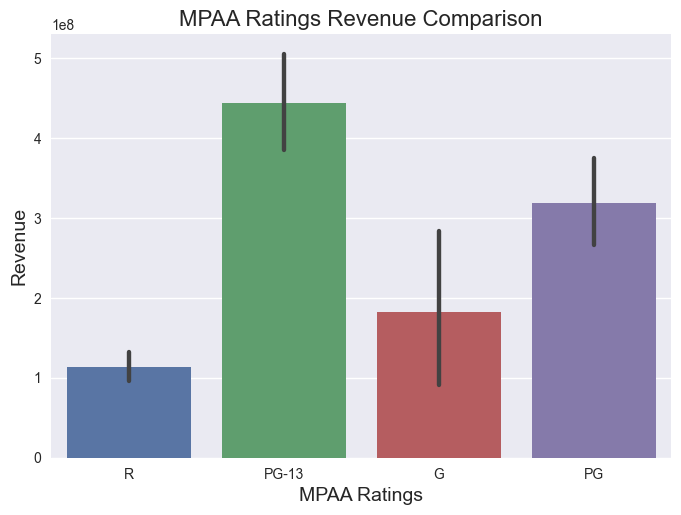

In [303]:
#Display new visualization of comparison with outliers removed
sns.barplot(data=df, x='certification',y='revenue')
plt.xlabel('MPAA Ratings', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.title('MPAA Ratings Revenue Comparison', fontsize=16);

### Final Conclusion: We can see from the visualization and testing that MPAA ratings of movies that are in pg-13 makes a lot more revenue than the other ratings. Additionally, the other ratings also have different revenues, with rated r being the lowest revenue.

# Are Certain Genre's More Popular Than Others?

1. State your Null Hypothesis and Alternative Hypothesis
* Null Hypothesis: All movie genres have the same popularity
* Alternate Hypothesis: Movies of different genres are more popular than others
2. Select the correct test according to the data type and number of samples
* Type of Data? numerical since our target feature is popularity
* How many groups/samples? mulitple groups
* Therefore, which test is appropriate? We will try using ANOVA since its great for handling numerical data with multiple groups

In [304]:
#Check genres
df.loc[5, 'genres']

5    [{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...
5    [{'id': 878, 'name': 'Science Fiction'}, {'id'...
5    [{'id': 878, 'name': 'Science Fiction'}, {'id'...
Name: genres, dtype: object

In [305]:
#Define get genre name for genres
def get_genre_name(x):
    x = x.replace("'",'"')
    x = json.loads(x)
    
    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres


In [306]:
#Use explode to split the genres into new column
df['genre_list']= df['genres'].apply(get_genre_name)
df_explode = df.explode('genre_list')
df_explode

C:\Users\erics\AppData\Local\Temp\ipykernel_22380\2965964261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre_list']= df['genres'].apply(get_genre_name)


,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,genre_list
30,tt0132910,0.0,/s6cgAveWCam2hYgdPhD3WbrjSBt.jpg,"{'id': 9436, 'name': 'The Crow Collection', 'p...",10000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",https://www.miramax.com/movie/crow-iii-salvation/,9456.0,en,The Crow: Salvation,Alex Corvis returns to the world of the living...,14.204,/wA8nRfRyv17CCIn0xFsH9aZe7jw.jpg,"[{'id': 4030, 'logo_path': None, 'name': 'Jeff...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",2000-10-31,0.0,102.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"For Vengeance, For Justice, For Love.",The Crow: Salvation,0.0,5.4,247.0,R,Action
30,tt0132910,0.0,/s6cgAveWCam2hYgdPhD3WbrjSBt.jpg,"{'id': 9436, 'name': 'The Crow Collection', 'p...",10000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",https://www.miramax.com/movie/crow-iii-salvation/,9456.0,en,The Crow: Salvation,Alex Corvis returns to the world of the living...,14.204,/wA8nRfRyv17CCIn0xFsH9aZe7jw.jpg,"[{'id': 4030, 'logo_path': None, 'name': 'Jeff...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",2000-10-31,0.0,102.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"For Vengeance, For Justice, For Love.",The Crow: Salvation,0.0,5.4,247.0,R,Thriller
30,tt0132910,0.0,/s6cgAveWCam2hYgdPhD3WbrjSBt.jpg,"{'id': 9436, 'name': 'The Crow Collection', 'p...",10000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",https://www.miramax.com/movie/crow-iii-salvation/,9456.0,en,The Crow: Salvation,Alex Corvis returns to the world of the living...,14.204,/wA8nRfRyv17CCIn0xFsH9aZe7jw.jpg,"[{'id': 4030, 'logo_path': None, 'name': 'Jeff...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",2000-10-31,0.0,102.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"For Vengeance, For Justice, For Love.",The Crow: Salvation,0.0,5.4,247.0,R,Crime
30,tt0132910,0.0,/s6cgAveWCam2hYgdPhD3WbrjSBt.jpg,"{'id': 9436, 'name': 'The Crow Collection', 'p...",10000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",https://www.miramax.com/movie/crow-iii-salvation/,9456.0,en,The Crow: Salvation,Alex Corvis returns to the world of the living...,14.204,/wA8nRfRyv17CCIn0xFsH9aZe7jw.jpg,"[{'id': 4030, 'logo_path': None, 'name': 'Jeff...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",2000-10-31,0.0,102.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"For Vengeance, For Justice, For Love.",The Crow: Salvation,0.0,5.4,247.0,R,Fantasy
30,tt0132910,0.0,/s6cgAveWCam2hYgdPhD3WbrjSBt.jpg,"{'id': 9436, 'name': 'The Crow Collection', 'p...",10000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",https://www.miramax.com/movie/crow-iii-salvation/,9456.0,en,The Crow: Salvation,Alex Corvis returns to the world of the living...,14.204,/wA8nRfRyv17CCIn0xFsH9aZe7jw.jpg,"[{'id': 4030, 'logo_path': None, 'name': 'Jeff...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",2000-10-31,0.0,102.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"For Vengeance, For Justice, For Love.",The Crow: Salvation,0.0,5.4,247.0,R,Mystery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,tt9777666,0.0,/yizL4cEKsVvl17Wc1mGEIrQtM2F.jpg,"{'id': 848922, 'name': 'The Tomorrow War Colle...",200000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",https://www.amazon.com/dp/B093CQZ2SM,588228.0,en,The Tomorrow War,The world is stunned when a group of time trav...,267.670,/34nDCQZwaEvsy4CFO5hkGRFDCVU.jpg,"[{'id': 82819, 'logo_path': '/5Z8WWr0Lf1tInVWw...","[{'iso_3166_1': 'US', 'name': 'United States o...",2021-07-02,0.0,138.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The fight for tomorrow begins today.,The Tomorro

## Test Normality

No normality need since groups are greater than 20

In [307]:
#Drop original genre column
df = df.drop(columns='genres')
df = df_explode

In [308]:
#Check value counts of new genre column
df['genre_list'].value_counts()

Action             298
Adventure          265
Comedy             216
Thriller           168
Family             150
Fantasy            147
Science Fiction    133
Drama              131
Animation          129
Horror             115
Crime               97
Mystery             63
Romance             41
Music               13
War                  9
History              8
Western              3
TV Movie             1
Name: genre_list, dtype: int64

In [309]:
## Create groups dictionary. There are only 2 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df['genre_list'].unique():
    ## Get series for group and rename
    data = df.loc[df['genre_list']==i,'popularity'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()


dict_keys(['Action', 'Thriller', 'Crime', 'Fantasy', 'Mystery', 'Science Fiction', 'Comedy', 'Adventure', 'Animation', 'Family', 'Drama', 'Horror', 'Romance', 'Western', 'War', 'History', 'Music', 'TV Movie'])

## Test Equal Variance

In [310]:
# with the * operator 
result2 = stats.levene(*groups.values())
result2.pvalue <0.05

True

In [311]:
# Use an if-ele to help interpret the p-value
if result2.pvalue <.05:
    print('The groups DO NOT have equal variance')
else:
    print('The groups DO have equal variance')

The groups DO NOT have equal variance


According to the equal variance, there is no an equal variance and so we meet our assumption. This means we reject the null hypothesis and accept our alternative hypothesis.

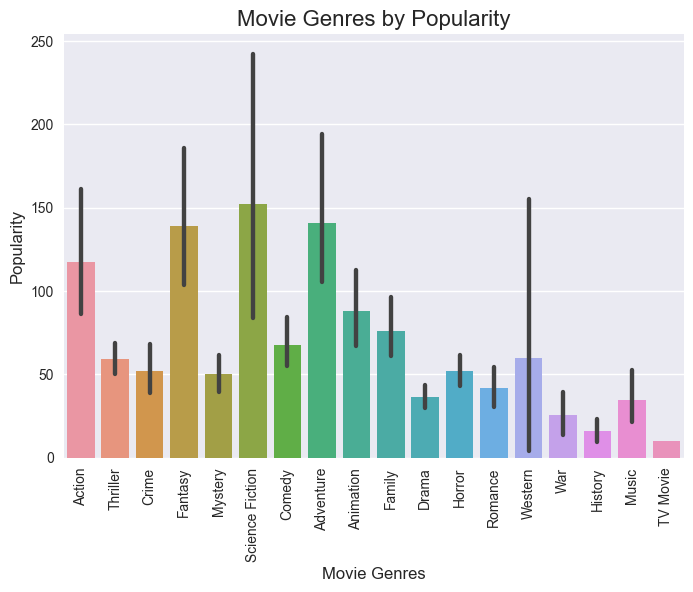

In [312]:
#Display exploratory visualization of genres by popularity
plt.style.use('seaborn')
ax = sns.barplot(data=df, x='genre_list',y='popularity')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xlabel('Movie Genres', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.title('Movie Genres by Popularity', fontsize=16);

### Final Conclusion: We can see that different genres have different popularities. According to the chart we can see that science fiction movies are the most popular out of the group.

# Do some movies base on different genres make more movie than others?

1. State your Null Hypothesis and Alternative Hypothesis
* Null Hypothesis: All movie genres generate the same profits
* Alternate Hypothesis: Different movie genres generate significantly more revenue than others
2. Select the correct test according to the data type and number of samples
* Type of Data? numerical since our target feature is revenue
* How many groups/samples? multiple groups
* Therefore, which test is appropriate? We will try using ANOVA since its great for handling numerical data with multiple groups

## Test Normality
No normality need since groups are greater than 20

## Test Equal Variance

In [313]:
# Create values and labels
values3 = df['revenue']
labels3 = df['genre_list']


In [314]:
# with the * operator 
result3 = stats.levene(*groups.values())
result3.pvalue <0.05

True

In [315]:
# Use an if-ele to help interpret the p-value
if result2.pvalue <.05:
    print('The groups DO NOT have equal variance')
else:
    print('The groups DO have equal variance')

The groups DO NOT have equal variance


In [316]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values3,labels3)
tukeys_results.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
Action,Adventure,115473066.9256,0.0285,5329314.9116,225616818.9395,True
Action,Animation,-68337667.8568,0.9595,-205820252.5725,69144916.8589,False
Action,Comedy,-143413091.9494,0.0024,-259982150.7661,-26844033.1327,True
Action,Crime,-201363535.0493,0.0006,-353853507.7704,-48873562.3281,True
Action,Drama,-218127927.2639,0.0,-354876122.8049,-81379731.723,True
Action,Family,-63773789.5235,0.9656,-194367416.4454,66819837.3985,False
Action,Fantasy,78557984.2316,0.8237,-52919063.6727,210035032.1359,False
Action,History,-320750461.3985,0.6099,-788102698.3962,146601775.5993,False
Action,Horror,-274397229.2626,0.0,-417601085.0907,-131193373.4346,True
Action,Music,-195581293.1389,0.9297,-565185686.0938,174023099.816,False


According to the equal variance, there is no an equal variance and so we meet our assumption. This means we reject the null hypothesis and accept our alternative hypothesis.

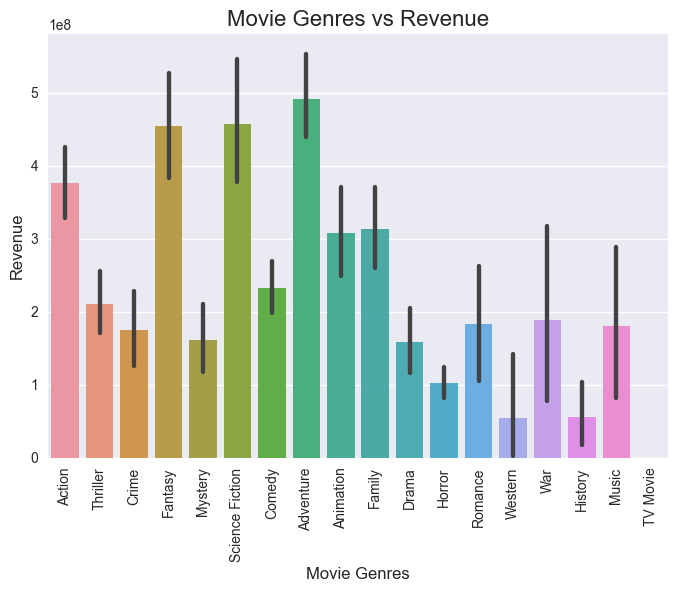

In [317]:
#Display exploratory visualization revenue based on genres
plt.style.use('seaborn')
ax = sns.barplot(data=df, x='genre_list',y='revenue')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xlabel('Movie Genres', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.title('Movie Genres vs Revenue', fontsize=16);

### Final Conclusion: The visualization and testing informs us that there are significant differences in revenue based on movie genres. According to the visualization, the science fiction and adventure genres generate more revenue.